In [56]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline


In [57]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
whale_navs = pd.read_csv(Path("../Module_4_Challenge/Resources/whale_navs.csv"), index_col = 'date', parse_dates = True, infer_datetime_format = True)

# Review the first 5 rows of the DataFrame
whale_navs.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [58]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
whale_navs_returns = whale_navs.pct_change().dropna()

# Review the first five rows of the daily returns DataFrame.
whale_navs_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

<AxesSubplot:title={'center':'Portfolio Daily Returns'}, xlabel='date'>

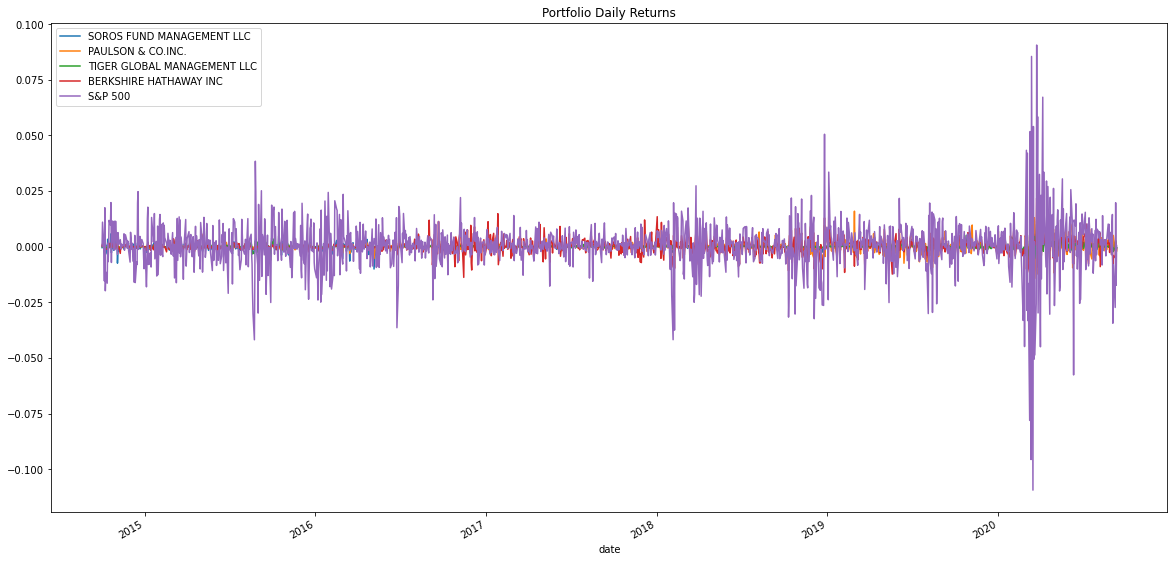

In [59]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
whale_navs_returns.plot(figsize = (20,10), title = 'Portfolio Daily Returns')


In [60]:
# Calculate the cumulative returns of the 4 fund portfolios and the S&P 500
whale_navs_cumulative = (1 + whale_navs_returns).cumprod() -1

# Review the last 5 rows of the cumulative returns DataFrame
display(whale_navs_cumulative.tail())


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,-0.012645,-0.041813,0.055714,0.244856,0.762645
2020-09-08,-0.014360,-0.043622,0.054373,0.238608,0.714484
2020-09-09,-0.013261,-0.041591,0.057221,0.240858,0.748341
2020-09-10,-0.014502,-0.040260,0.055539,0.237883,0.717983
2020-09-11,-0.014914,-0.042113,0.055081,0.236625,0.718858


<AxesSubplot:title={'center':'Portfolio Cumulative Returns'}, xlabel='date'>

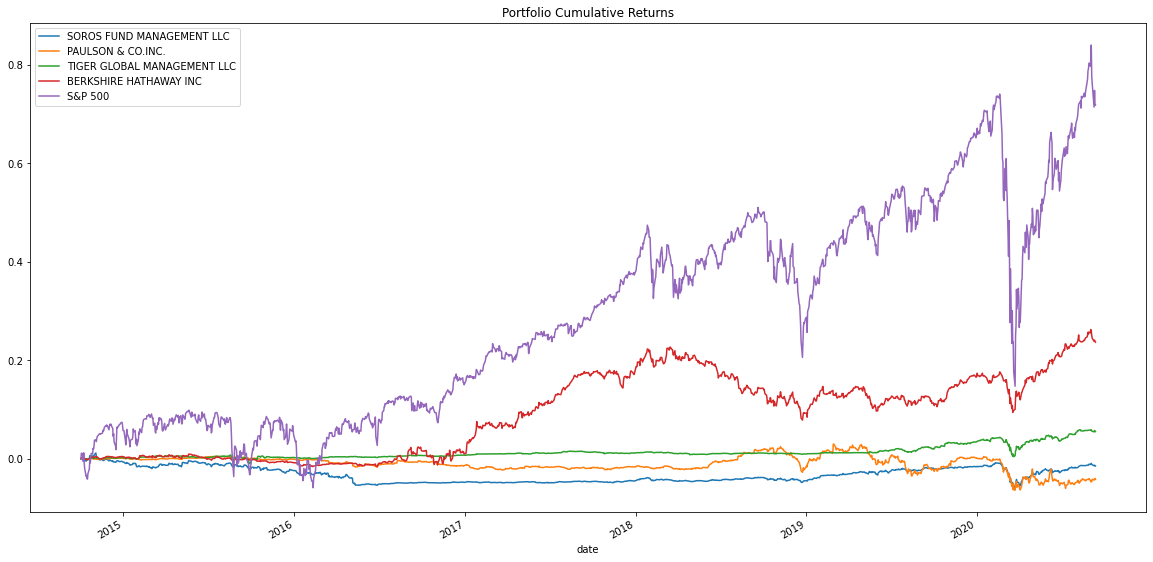

In [61]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
whale_navs_cumulative.plot(figsize = (20,10), title = 'Portfolio Cumulative Returns')


**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** # No portfolios outperform the S&P 500 

---

<AxesSubplot:title={'center':'Portfolio Return Volatility'}>

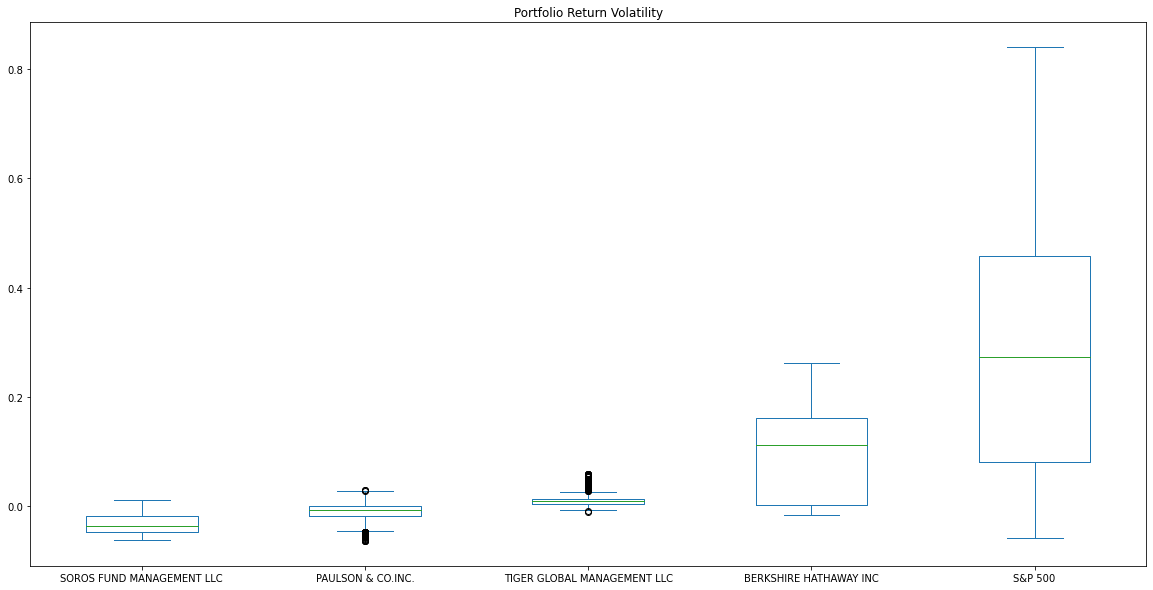

In [62]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
whale_navs_cumulative.plot(figsize = (20,10), kind = 'box', title = 'Portfolio Return Volatility')


<AxesSubplot:title={'center':'Portfolio Return Volatility ex. S&P 500'}>

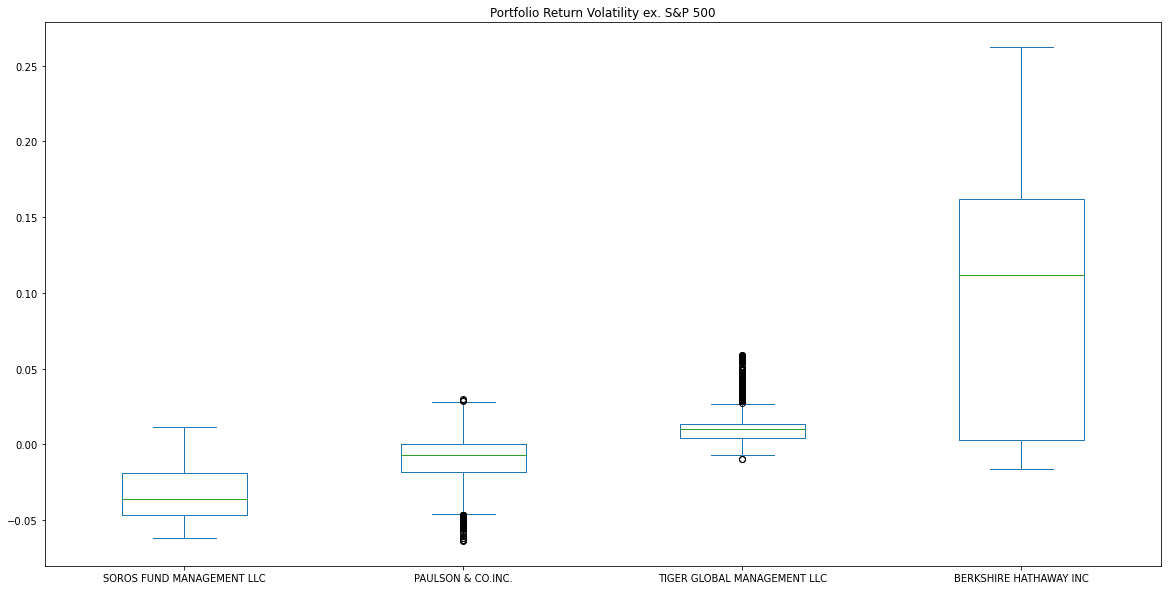

In [63]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
whale_navs_cumulative_xsp = whale_navs_cumulative.drop(['S&P 500'], axis='columns')

# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
whale_navs_cumulative_xsp.plot(figsize = (20,10), kind = 'box', title = 'Portfolio Return Volatility ex. S&P 500')

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** # Based on the box plot, Berkshire Hathaway Inc displayed the most volatility while Tiger Global Management was the least volatile.

---

In [80]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500

whale_navs_returns_std = whale_navs_returns.std() #these are daily values

# Review the standard deviations sorted smallest to largest
whale_navs_returns_std.sort_values()


TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [65]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500

whale_navs_returns_std_ann = whale_navs_returns_std * (252 **0.5)

# Review the annual standard deviations smallest to largest
whale_navs_returns_std_ann.sort_values()


TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

<AxesSubplot:title={'center':'Rolling 21 Day Standard Deviation'}, xlabel='date'>

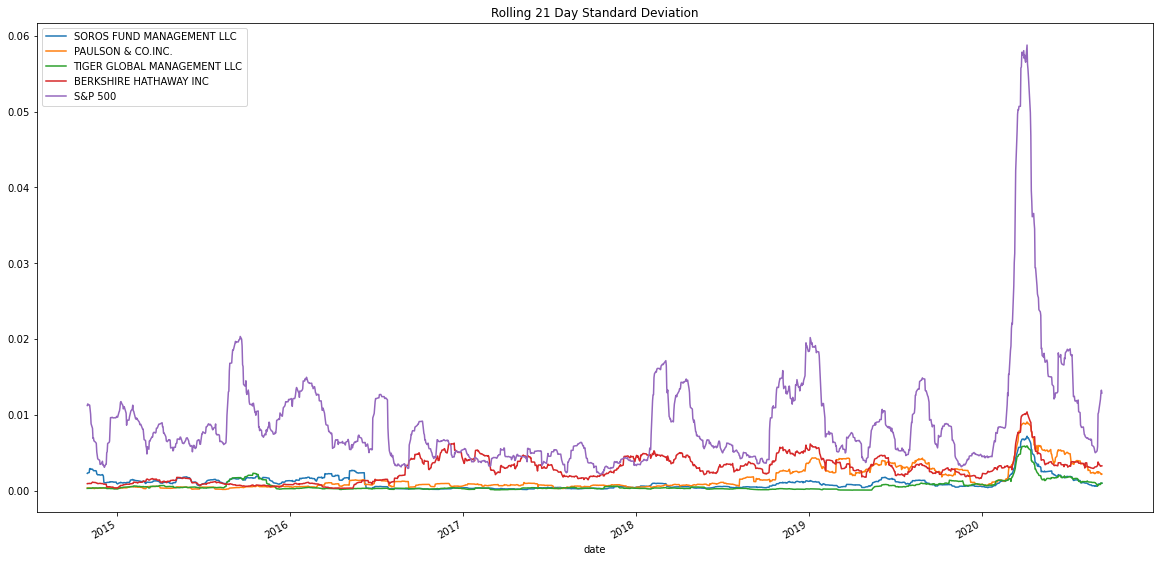

In [66]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size

whale_navs_returns_std_21 = whale_navs_returns.rolling(window=21).std()
whale_navs_returns_std_21.plot(figsize = (20,10), title = 'Rolling 21 Day Standard Deviation')


<AxesSubplot:title={'center':'Rolling 21 Day Standard Deviation ex. S&P 500'}, xlabel='date'>

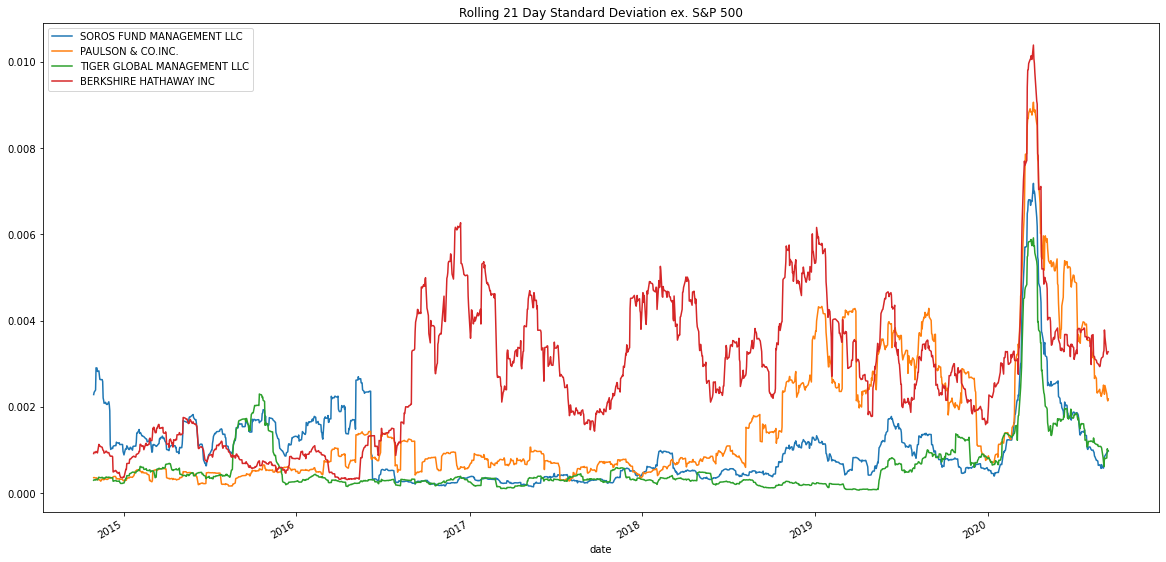

In [67]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
whale_navs_returns_xsp = whale_navs_returns.drop(['S&P 500'], axis='columns')
whale_navs_returns_std_21_xsp = whale_navs_returns_xsp.rolling(window=21).std()
whale_navs_returns_std_21_xsp.plot(figsize = (20,10), title = 'Rolling 21 Day Standard Deviation ex. S&P 500')


**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** # There are no portfolios which pose more risk than the S&P 500 based on annualized standard deviation

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** # Yes, periods of elevated volatility in the S&P 500 also results in elevated volatility amongst the four portfolios


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** # During the first two years, Soros displayed the most volatility, however in mid 2016, Berkshire Hathaway's volatility increased and became the more volatile portfolio for most of the remainder of the data set. As a whole, Berkshire was the most volatile portfolio and poses the most risk based on standard deviation.

---

In [68]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year

whale_navs_returns_annual = whale_navs_returns.mean() * 252

# Review the annual average returns sorted from lowest to highest
whale_navs_returns_annual.sort_values()


PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [81]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.

whale_navs_sharpe = whale_navs_returns_annual / whale_navs_returns_std_ann

# Review the Sharpe ratios sorted lowest to highest

whale_navs_sharpe.sort_values()

#Berkshire has the highest risk adjusted returns

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios'}>

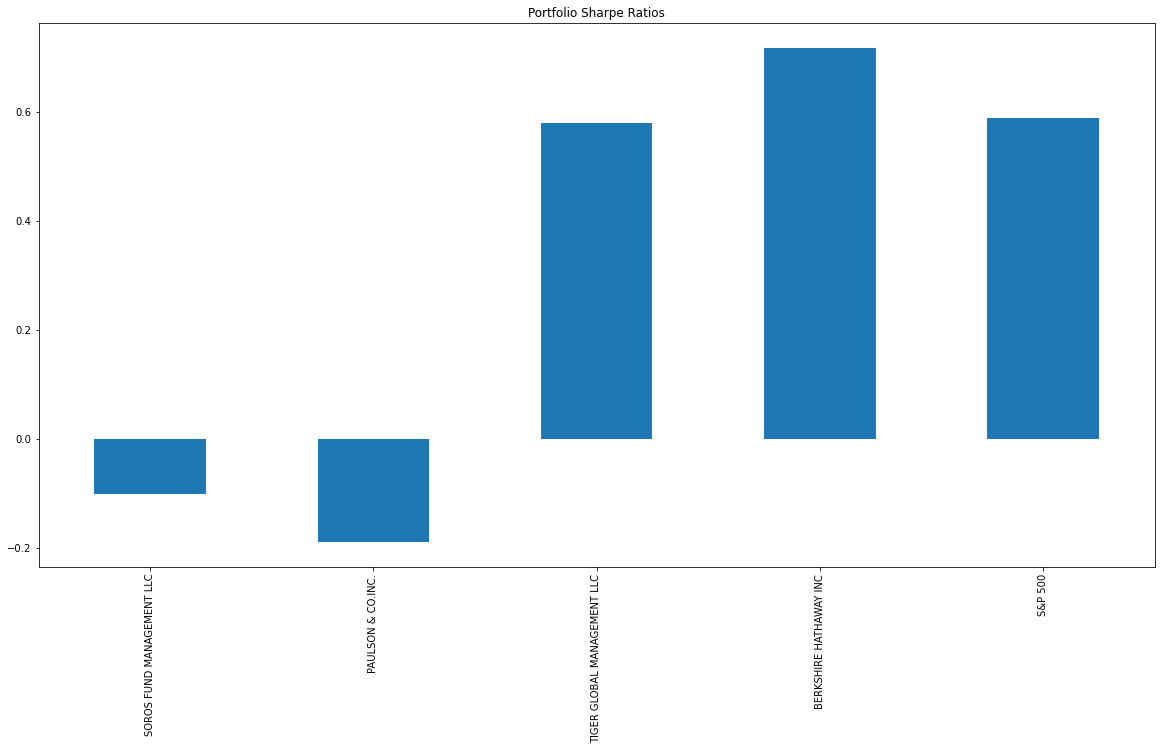

In [70]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size

whale_navs_sharpe.plot(figsize = (20,10), kind='bar', title = 'Portfolio Sharpe Ratios')


**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** # Berkshire Hathaway offers the best risk-reward profile with a Sharpe of 0.717. Paulson offers the worst with a Sharpe of -0.189

---

In [71]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
market_variance_60 = whale_navs_returns['S&P 500'].rolling(window=60).var()
market_variance_60.tail()


date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

In [72]:
# Calculate the covariance using a 60-day rolling window 

tiger_covariance_60 = whale_navs_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(whale_navs_returns['S&P 500'])


# Review the last five rows of the covariance data

tiger_covariance_60.tail()


date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [73]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)

tiger_beta_60 = tiger_covariance_60 / market_variance_60


# Review the last five rows of the beta information

tiger_beta_60.tail()



date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

In [82]:
# Calculate the average of the 60-day rolling beta
print('Tiger avg beta:')
tiger_beta_60.mean()

#very low

Tiger avg beta:


0.03093001487238774

<AxesSubplot:title={'center':'Portfolio Rolling Beta'}, xlabel='date'>

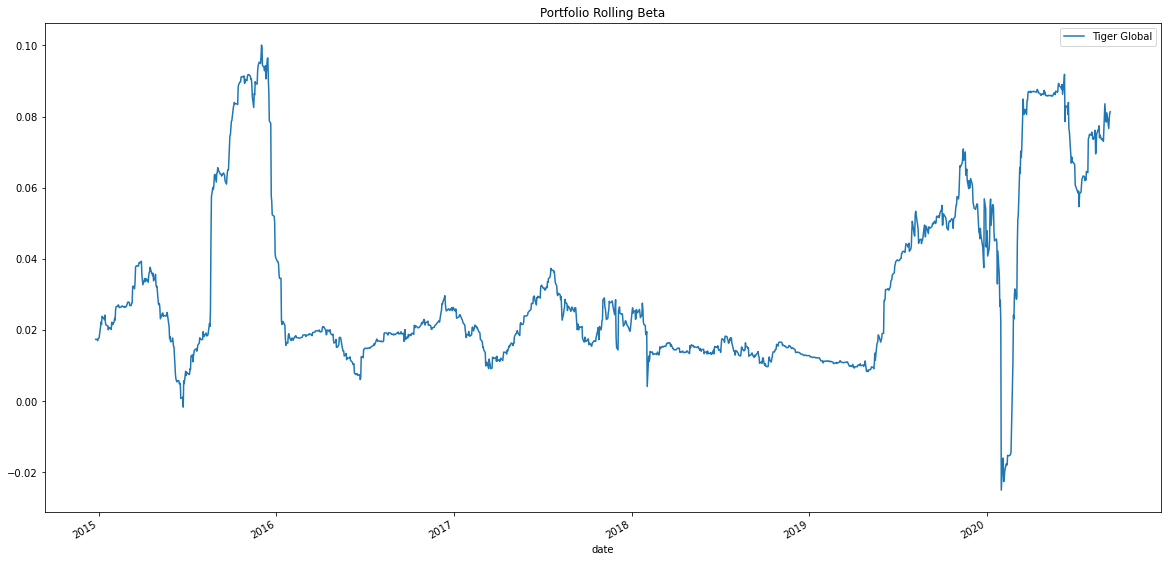

In [83]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size

tiger_beta_60.plot(figsize = (20,10), title = 'Portfolio Rolling Beta', legend = True, label = 'Tiger Global')



In [84]:
# Calculate the covariance using a 60-day rolling window 


berkshire_covariance_60 = whale_navs_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(whale_navs_returns['S&P 500'])

# Review the last five rows of the covariance data


berkshire_covariance_60.tail()


date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [85]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)

berkshire_beta_60 = berkshire_covariance_60 / market_variance_60

# Review the last five rows of the beta information


berkshire_beta_60.tail()


date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

In [86]:
# Calculate the average of the 60-day rolling beta
print('Berkshire avg beta:')
berkshire_beta_60.mean()


Berkshire avg beta:


0.2214986101354593

<AxesSubplot:title={'center':'Portfolio Rolling Beta'}, xlabel='date'>

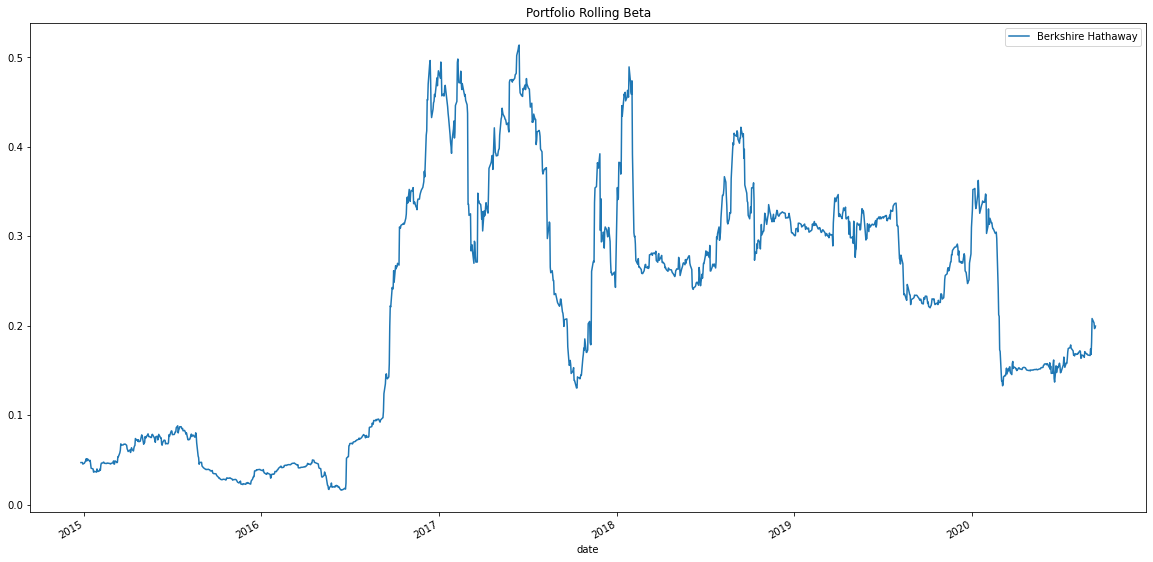

In [87]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
berkshire_beta_60.plot(figsize = (20,10), title = 'Portfolio Rolling Beta', legend = True, label = 'Berkshire Hathaway')


**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # Berkshire Hathaway would appear more sensitive to market movements


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # Given the higher risk adjusted returns as measured by the Sharpe ratio, I would recommend Berkshire Hathaway. While Berkshire has a higher beta than Tiger Global, it is still relatively low at 0.22 on average which should provide sufficient diversification relative to the broad market. In addition, Tiger has historically provided much lower returns than Berkshire.

---